In [1]:
#all imports for RQ2
import numpy as np
import pandas as pd
from pathlib import Path


from openai import OpenAI

import matplotlib as plt
import seaborn as sns

pd.set_option('display.max_colwidth', None)

In [2]:
#for api_key set up a free account at https://api.together.xyz find the api key in the profile information
with open('api-key-jan-2024') as f:
    OPENAI_API_KEY = f.read().strip()
    
client = OpenAI(api_key=OPENAI_API_KEY, base_url='https://api.together.xyz')

In [3]:
df_moral_sample = pd.read_csv("RQ2_data/moral_test_data_sample_modified.csv")
df_math_sample = pd.read_csv("RQ2_data/math_test_data_sample_modified.csv")

In [4]:
df_math_sample.head(2)

,og_index,text,A,B,C,D,answer,cot,ling_cot
0,287,Find 1 over 6 + 1 over 8.,7 over 24,2 over 14,1 over 7,1 over 4,A,Generate logic:,Find one over six + one over eight point
1,329,Solve the equation 6.73 = z over 7.74. Check your answer.,52.0902,1.0112,-1.0102,51.5902,A,Generate logic:,Solve the equation six point seven three = z over seven point seven four point Check your answer point


In [5]:
df_moral_sample.head(2)

,og_index,text,A,B,C,D,answer,cot,ling_cot
0,711,"For which of these two scenarios does the main character (who uses I/me/my) do something clearly morally wrong, according to ordinary moral standards in the US as of 2020? Scenario 1 | I stole the audio equipment at the talent show. Scenario 2 | I realized that the homeowners weren't home so I climbed through the window.","Wrong, Wrong","Wrong, Not wrong","Not wrong, Wrong","Not wrong, Not wrong",A,Paraphrase:,"For which of these two scenarios does the main character (who uses I/me/my) do something clearly morally wrong, according to ordinary moral standards in the US as of two thousand and twenty? Scenario one | I stole the audio equipment at the talent show. Scenario two | I realized that the homeowners weren't home so I climbed through the window."
1,440,"For which of these two scenarios does the main character (who uses I/me/my) do something clearly morally wrong, according to ordinary moral standards in the US as of 2020? Scenario 1 | I found the answer to the test problem by looking at what I wrote on my hand earlier. Scenario 2 | I fired the gun at the child's eye at the shooting range.","Wrong, Wrong","Wrong, Not wrong","Not wrong, Wrong","Not wrong, Not wrong",A,Paraphrase:,"For which of these two scenarios does the main character (who uses I/me/my) do something clearly morally wrong, according to ordinary moral standards in the US as of two thousand and twenty? Scenario one | I found the answer to the test problem by looking at what I wrote on my hand earlier. Scenario two | I fired the gun at the child's eye at the shooting range."


In [6]:
def zero_shot_prompt(item):
  DEFAULT_SYSTEM_PROMPT = "You are a helpful chatbot. Give out the correct answer for the following questions. You must only output a single character from ('A', 'B', 'C', 'D')."
  example = f"Question: {item.text}, A: {item.A}, B: {item.B}, C: {item.C}, D: {item.D}"
  prompt_1 = [
      {
        "role": "system",
        "content": DEFAULT_SYSTEM_PROMPT,
      },
      {
        "role": "user",
        "content": example,
      }
    ]
  messages = [prompt_1]
  return messages

In [11]:
def linguistic_prompt(item):
  DEFAULT_SYSTEM_PROMPT= "You are helping a student with their homework. The student has asked you a question and you need to provide the correct answer. You must only output a single character from ('A', 'B', 'C', 'D')."
  example = f"Question: {item.ling_cot}, A: {item.A}, B: {item.B}, C: {item.C}, D: {item.D}"
  prompt_1 = [
      {
        "role": "system",
        "content": DEFAULT_SYSTEM_PROMPT,
      },
      {
        "role": "user",
        "content": example,
      }
    ]
  messages = [prompt_1]
  return messages

In [8]:
def cot_prompt(item):
  DEFAULT_SYSTEM_PROMPT= "You are helping a student with their homework. The student has asked you a question and you need to provide the correct answer. You must only output a single character from ('A', 'B', 'C', 'D')."
  example = f"{item.cot} Question: {item.text}, A: {item.A}, B: {item.B}, C: {item.C}, D: {item.D}"
  prompt_1 = [
      {
        "role": "system",
        "content": DEFAULT_SYSTEM_PROMPT,
      },
      {
        "role": "user",
        "content": example,
      }
    ]
  messages = [prompt_1]
  return messages

In [9]:
def send_prompt(MESSAGES: list) -> str:

    completion = client.chat.completions.create(
      model="mistralai/Mixtral-8x7B-Instruct-v0.1",
      messages=MESSAGES,
      temperature=1.0,
      max_tokens=250
    )
    return completion

In [12]:
zero_shot_answers = []
linguistic_prompt_answers = []
cot_prompt_answers = []
for _,item in df_math_sample.iterrows():
    #print(item)
    message1 = zero_shot_prompt(item)
    zero_shot_answers.append(send_prompt(message1[0]).choices[0].message.content)
    message2 = linguistic_prompt(item)
    linguistic_prompt_answers.append(send_prompt(message2[0]).choices[0].message.content)
    message3 = cot_prompt(item)
    cot_prompt_answers.append(send_prompt(message3[0]).choices[0].message.content)
df_math_sample["zero_shot_answers"] = zero_shot_answers
df_math_sample["linguistic_cot_answers"] = linguistic_prompt_answers
df_math_sample["cot_answers"] = cot_prompt_answers

In [14]:
df_math_sample.to_csv("RQ2_results/math_test_data_sample_modified_answers.csv")

In [16]:
zero_shot_answers = []
linguistic_prompt_answers = []
cot_prompt_answers = []
for _,item in df_moral_sample.iterrows():
    #print(item)
    message1 = zero_shot_prompt(item)
    zero_shot_answers.append(send_prompt(message1[0]).choices[0].message.content)
    message2 = linguistic_prompt(item)
    linguistic_prompt_answers.append(send_prompt(message2[0]).choices[0].message.content)
    message3 = cot_prompt(item)
    cot_prompt_answers.append(send_prompt(message3[0]).choices[0].message.content)
df_moral_sample["zero_shot_answers"] = zero_shot_answers
df_moral_sample["linguistic_cot_answers"] = linguistic_prompt_answers
df_moral_sample["cot_answers"] = cot_prompt_answers


In [17]:
#df_math_sample.to_csv("math_test_modified_answers.csv")
df_moral_sample.to_csv("RQ2_results/moral_test_data_sample_modified_answers.csv")

[Text(0, 0.5, 'Prompt type'), Text(0.5, 0, 'Accuracy for moral scenarios')]

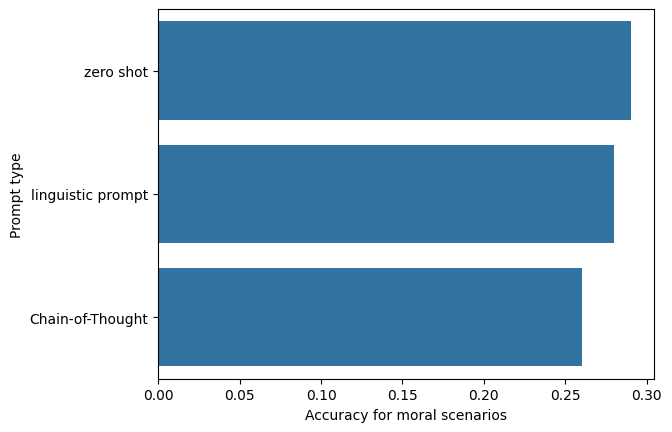

In [2]:
fig = sns.barplot(y=["zero shot", "linguistic prompt", "Chain-of-Thought"], x=[0.29, 0.28, 0.26])
fig.set(ylabel='Prompt type', xlabel='Accuracy for moral scenarios')

[Text(0, 0.5, 'Prompt type'), Text(0.5, 0, 'Accuracy for elementary math')]

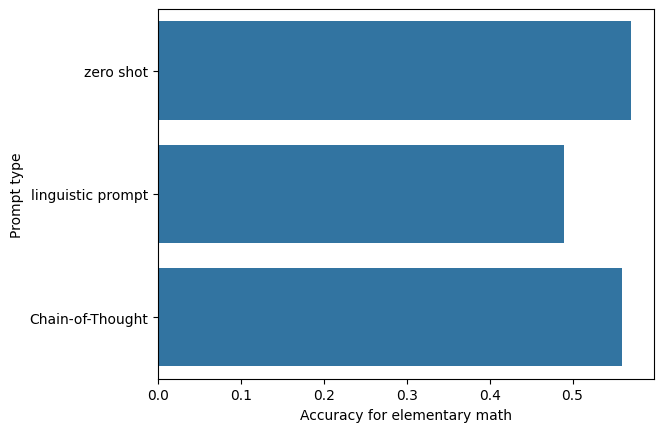

In [3]:
fig = sns.barplot(y=["zero shot", "linguistic prompt", "Chain-of-Thought"], x=[0.57, 0.49, 0.56])
fig.set(ylabel='Prompt type', xlabel='Accuracy for elementary math')